In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from pylab import rcParams
%pylab inline
pd.set_option('display.max_rows', 999)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


In [3]:
date_parser = lambda x : pd.to_datetime(x, unit='ms')
df_price = pd.read_csv('data/player_price.csv', parse_dates=['timestamp'], date_parser=date_parser)
df_stats = pd.read_csv('data/player_stats.csv')

In [4]:
df_price['player_name'].value_counts(sort=True).head(50)

Sánchez              2268
Hernández            2212
Dembélé              1987
Traoré               1967
Kane                 1678
Hazard               1668
Higuaín              1649
Müller               1531
Lukaku               1529
Cavani               1466
Touré                1446
Gómez                1414
Rodríguez            1377
Fernández            1375
López                1374
Castro               1365
Pogba                1335
Son                  1305
Lacazette            1304
Salah                1278
Payet                1262
Schmeichel           1242
Dybala               1241
Mané                 1210
Ibrahimovic          1193
Gabriel              1189
Isco                 1187
Mertens              1183
Icardi               1181
Lewandowski          1166
Balotelli            1164
Diego Costa          1142
Giuliano             1122
Cristiano Ronaldo    1116
Ayew                 1110
Kanté                1103
Pérez                1102
Davies               1101
Filipe Luís 

In [5]:
df_price.groupby(['player_name'])['xbox_price']

AttributeError: Cannot access callable attribute 'iloc' of 'SeriesGroupBy' objects, try using the 'apply' method

0 1003


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


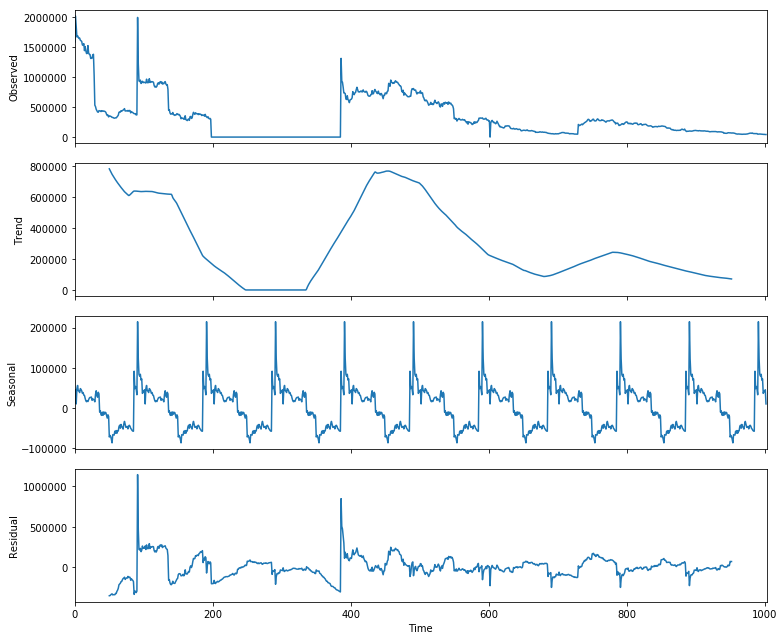

In [8]:
rcParams['figure.figsize'] = 11, 9
y = df_price[df_price.player_name == 'Aubameyang']['xbox_price']
y.index= df_price[df_price.player_name == 'Aubameyang']['timestamp']

print(y.isnull().sum(), y.notnull().sum())
y.fillna(method='ffill', inplace=True)
y.fillna(method='bfill', inplace=True)
decomposition = sm.tsa.seasonal_decompose(y.values, freq=100)
fig = decomposition.plot()

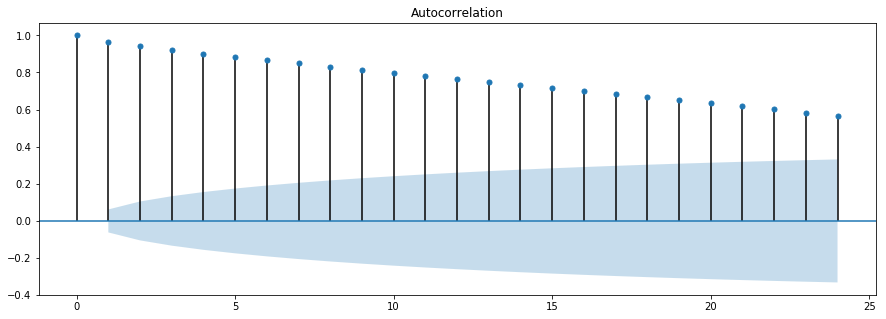

In [9]:
plt.figure(figsize(15,5))
sm.graphics.tsa.plot_acf(y.values, lags=24)
pylab.show()

In [10]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])
y = np.log(y+1)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])
y_box, lmbda = stats.boxcox(y)
plt.figure(figsize(15,7))
y_box.plot()
plt.ylabel(u'Transformed CO2 ppm')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y_box)[1])

Критерий Дики-Фуллера: p=0.000676


Критерий Дики-Фуллера: p=0.264006


ValueError: Data must be positive.